# Checkpoint 3
Riley Schaefer<br>
12/04/23

In [1]:
import pandas as pd
import requests
import json
import base64
import urllib
from datetime import datetime
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import sqlite3
from selenium import webdriver
from selenium.webdriver.common.by import By
chinook = sqlite3.connect(r"C:\Users\rjs06\EMAT-Data23\chinook\chinook.db")

***
### Gathering Data
I got this data from the "Reports" function within Wix.com. Using this function, I can gather the data from both the new and the old websites by seting the data to be from spicicic dates. 
***
`tr0` stands for `traffic report - site 0` as in the old site.<br>
`tr1` stands for `traffic report - site 1` as in the new site.<br>
***

In [2]:
tr0_data = pd.read_csv("Final Project CSV/traffic-report_site-0.csv")
tr0_data['Date'] = [datetime.strptime(x, '%b %d, %Y') for x in tr0_data['Date']]
tr0_data.sort_values('Date', ascending = True).head()

,Date,Page views,Site sessions,Unique visitors,Bounce rate,Avg. session duration,Avg. pages per session,Avg. time on page
225,2017-12-31,124,43,41,53%,"4m, 58s",2.1,"0m, 57s"
224,2018-01-07,149,46,43,50%,"3m, 3s",2.3,"0m, 43s"
223,2018-01-14,186,52,50,38%,"3m, 37s",2.6,"0m, 41s"
222,2018-01-21,354,79,72,38%,"4m, 27s",2.7,"0m, 45s"
221,2018-01-28,245,67,60,33%,"2m, 37s",2.6,"0m, 32s"


In [3]:
tr1_data = pd.read_csv("Final Project CSV/traffic-report_site-1.csv")
tr1_data['Date'] = [datetime.strptime(x, '%b %d, %Y') for x in tr1_data['Date']]
tr1_data.sort_values('Date', ascending = True).head()

,Date,Page views,Site sessions,Unique visitors,Bounce rate,Avg. session duration,Avg. pages per session,Avg. time on page
82,2022-04-24,151,68,53,59%,"4m, 17s",1.6,"1m, 5s"
81,2022-05-01,268,118,96,64%,"6m, 36s",1.5,"1m, 47s"
80,2022-05-08,238,107,78,63%,"8m, 54s",1.5,"1m, 48s"
79,2022-05-15,172,95,77,64%,"3m, 38s",1.3,"1m, 25s"
78,2022-05-22,332,156,113,64%,"10m, 22s",1.4,"2m, 59s"


##### Skewed Data Fix
However, the week of 2022-04-24 is the week that the old site was transfered to the new site. Thus, having significantly decreased data on both site 0 and 1 on that same week, I have removed that week from both data sets.

In [4]:
tr0_df = tr0_data.sort_values('Date', ascending = True).iloc[0:225]
tr1_df = tr1_data.sort_values('Date', ascending = True).iloc[1:83]
tr0 = pd.concat([tr0_df], ignore_index = True)
tr1 = pd.concat([tr1_df], ignore_index = True)

***
`tsr0` stands for `traffic sources report - site 0` as in the old site.<br>
`tsr1` stands for `traffic sources report - site 1` as in the new site.<br>
***

In [5]:
tsr0 = pd.read_csv("Final Project CSV/traffic-sources-report_site-0.csv")
tsr0.head()

,Traffic category,Traffic source,Site sessions,Page views,Unique visitors,Avg. session duration
0,Organic search,Google,"4,104","16,292","3,270","4m, 29s"
1,Direct,Direct,"2,338","6,445","1,368","3m, 31s"
2,Organic search,Bing,185,793,153,"6m, 31s"
3,Organic search,DuckDuckGo,74,304,68,"4m, 14s"
4,Organic search,Yahoo,76,270,61,"6m, 5s"


In [6]:
tsr1 = pd.read_csv("Final Project CSV/traffic-sources-report_site-1.csv")
tsr1.head()

,Traffic category,Traffic source,Site sessions,Page views,Unique visitors,Avg. session duration
0,Organic search,Google,"6,420","22,035","4,671","5m, 29s"
1,Direct,Direct,"5,810","16,565","2,876","4m, 28s"
2,Organic search,Bing,448,"1,440",313,"5m, 7s"
3,Organic search,DuckDuckGo,209,694,129,"5m, 52s"
4,Organic search,Yahoo,100,284,84,"5m, 46s"


***
### Analysis Plan
For Analysis Plan, you should have justifications for your chosen analysis and starting attempts at the
analysis.
***
### Y = B<sub>0</sub>X<sub>0</sub> + B<sub>0</sub>X<sub>1</sub> + E

I am using this data about the traffic of each site because it will tell me valuble information about both sites. For example, the unique visitors would imply new customers and spreading awereness (hense growth) and the number of site sesssions means how many people look at the website on a weekly basis. The higher these numbers are when compared to the first site, then the website is that much more popular than it was.

Now that I have my data, I can now compile and make comparisons between sites 0 and 1.

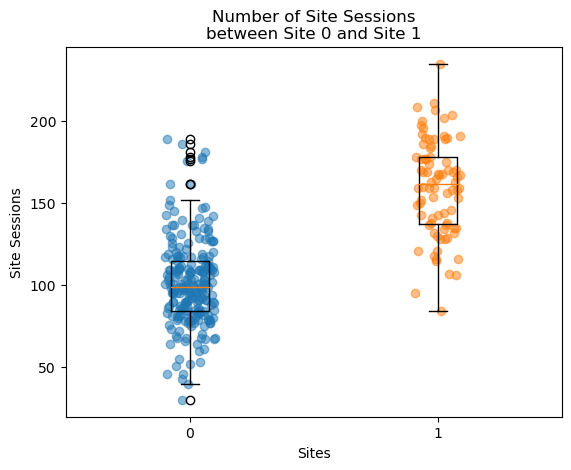

In [7]:
fig1, ax1 = plt.subplots()

tr0_sessions = tr0['Site sessions']
tr1_sessions = tr1['Site sessions']

tr0_xs = [0]*len(tr0_sessions)
tr1_xs = [1]*len(tr1_sessions)
tr0_x_jitter = np.random.uniform(-0.10, 0.10, len(tr0_xs))
tr1_x_jitter = np.random.uniform(-0.10, 0.10, len(tr1_xs))

ax1.boxplot(tr0_sessions, positions = [0])
ax1.boxplot(tr1_sessions, positions = [1])
ax1.scatter(tr0_xs + tr0_x_jitter, tr0_sessions, alpha = 0.5)
ax1.scatter(tr1_xs + tr1_x_jitter, tr1_sessions, alpha = 0.5)

ax1.set_title('Number of Site Sessions\nbetween Site 0 and Site 1')
ax1.set_xlabel('Sites')
ax1.set_ylabel('Site Sessions')

plt.show()

In [8]:
pv_tr = pd.concat([tr0["Page views"], tr1["Page views"]] , ignore_index = True)
ss_tr = pd.concat([tr0["Site sessions"], tr1["Site sessions"]] , ignore_index = True)
uv_tr = pd.concat([tr0["Unique visitors"], tr1["Unique visitors"]] , ignore_index = True)

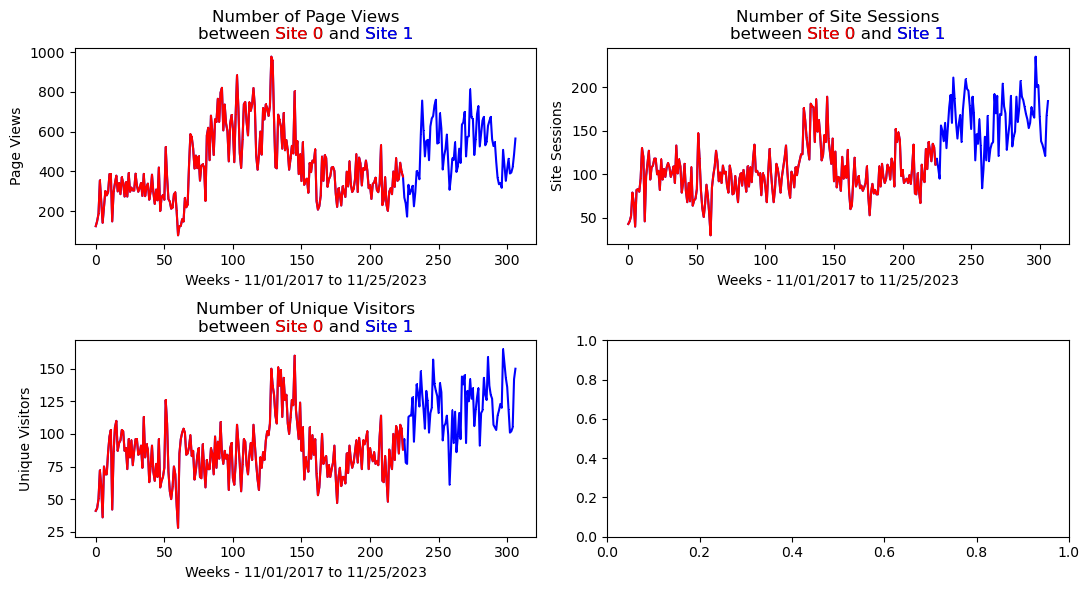

In [9]:
fig3, ax3 = plt.subplots(2, 2, figsize = (11, 6))

ax3[0,0].plot(pv_tr, ',-b')
ax3[0,0].plot(tr0["Page views"], ',-r')
ax3[0,0].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax3[0,0].set_ylabel('Page Views')
ax3[0,0].set_title('Number of Page Views\nbetween Site 0 and Site 1')
ax3[0,0].text(148, 1052, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax3[0,0].text(213.5, 1052, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

ax3[0,1].plot(ss_tr, ',-b')
ax3[0,1].plot(tr0["Site sessions"], ',-r')
ax3[0,1].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax3[0,1].set_ylabel('Site Sessions')
ax3[0,1].set_title('Number of Site Sessions\nbetween Site 0 and Site 1')
ax3[0,1].text(148, 252, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax3[0,1].text(213.5, 252, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

ax3[1,0].plot(uv_tr, ',-b')
ax3[1,0].plot(tr0["Unique visitors"], ',-r')
ax3[1,0].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax3[1,0].set_ylabel('Unique Visitors')
ax3[1,0].set_title('Number of Unique Visitors\nbetween Site 0 and Site 1')
ax3[1,0].text(148, 176, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax3[1,0].text(213.5, 176, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

plt.tight_layout()
plt.show()

***
### Preliminary Draft
&emsp;&ensp;This data analysis is attempting to show growth between the two websites. "Site 0" was the original website for Sportsmen's Shooting Center and "Site 1" is the same site that I redesigned and reuploaded overtop of the original. The purpose of this analysis is to show myself and my employers that the work that I have done is causing significant growth of the website and consequently the club itself. I was inspired to do this as my final project analysis because I saw that in the admin reports on Wix.com, the place that hosts the website, it has collected a lot of data naturally. When I was beginning to take this class and I heard of the final project, my thoughts immediately went to those data sets and I wondered if I could finally understand data analysis enough to do something with them. I could and here we are.<br>
&emsp;&ensp;As I mentioned, I got this data from the "Reports" function within Wix.com. Using this function, I can gather the data from both the new and the old websites by setting the data to be from specific dates. I am using this data about each site's traffic because it will tell me valuable information about both sites. For example, the unique visitors would imply new customers and spreading awareness (hence growth) and the number of site sessions means how many people look at the website weekly. The higher these numbers are when compared to the first site, the website is that much more popular than it was.<br>
&emsp;&ensp;I structured the data into a Bar Graph and multiple connected-line plots about the site sessions, the page views, and unique visitors between the sites. I plan to still use Bounce rate, Avg. session duration, Avg. pages per session, Avg. time on page, and possibly the traffic sources. All that was needed was to invert the ascending value and convert the time column to something that the system could use. However, the week of 2022-04-24 is the week that the old site was transferred to the new site. Thus, having significantly decreased data on both site 0 and 1 on that same week, I have removed that week from both data sets.<br>
&emsp;&ensp;From my analysis and visuals, I have learned that between site 0 and site 1: There is an increase in unique visitors and site sessions, but there is a decrease in the number of page views. From the datasets that I haven't visualized yet, I learned that there is a higher Bounce rate, Avg. session duration, and Avg. time on page, but with a lower Avg. pages per session. At least, that is what it appears to be. The audience/employers should focus on the visuals and the growth along with the different numbers between the sites.
***